# Time Series Forcasting

# importing required lib's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory analysis of time series data

#  Extracting the data

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df['Years']=df.Quarter.str.split('_').apply(lambda x:' 19'.join(x[:]))
df['date']=pd.to_datetime(df['Years'].str.split(' ').apply(lambda x:''.join(x[::-1])),dayfirst=True)

df.head()

,Quarter,Sales,Years,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [4]:
df=df.drop(['Quarter','Years'],axis=1)
df.head()

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [5]:
df.set_index('date',inplace=True)

In [6]:
df= df.resample('M').mean().interpolate(method='linear')
df.head()

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330


In [7]:
df.isnull().sum()

Sales    0
dtype: int64

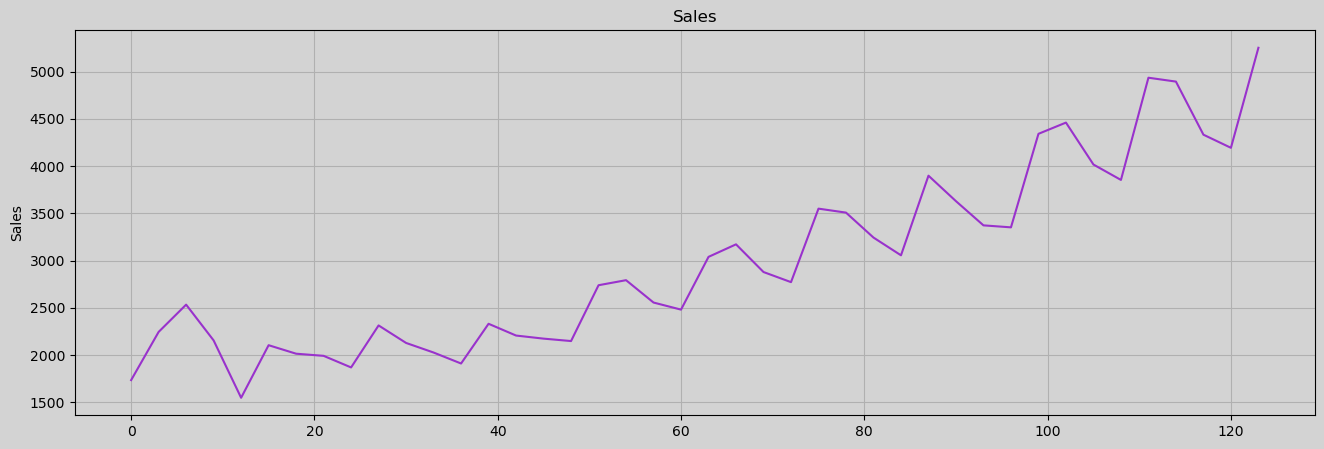

In [227]:
#ok lets see the plots how the power conspution varies with respect to time
plt.figure(facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df['Sales'].plot(title='Sales',figsize=(16,5),c='darkorchid',ylabel='Sales',grid=True);
#the same as above plot but this is scatter plot to find the distribution of data's

from above plot we can say that sales are increasing or moving upward ie.trend is towards upward and looks like Seasonality also present

<AxesSubplot:xlabel='Sales', ylabel='Density'>

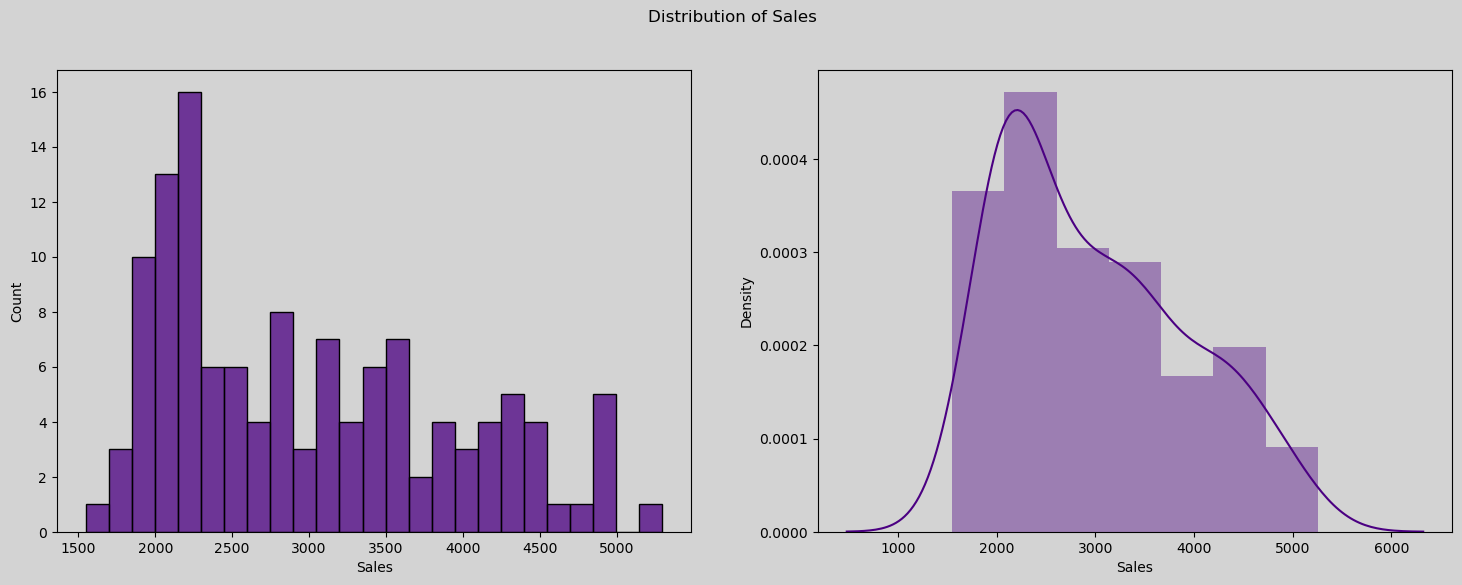

In [9]:
#finding whether the data's are normalliy distributed by visualizing through hist plots
import warnings
warnings.filterwarnings('ignore')
f, axes = plt.subplots(1, 2,figsize=(18, 6),facecolor='lightgrey')
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')
plt.suptitle('Distribution of Sales')
sns.histplot(df['Sales'],color='indigo',binwidth=150,cbar='black',ax=axes[0])
sns.distplot(df['Sales'],color='indigo',ax=axes[1])

In [10]:
#finding the skewness and kurtosis values
print('skewness :',df['Sales'].skew())
print('peakness :',df['Sales'].kurtosis())

skewness : 0.575886055961612
peakness : -0.787898549371358


In [12]:
df.reset_index(inplace=True)
df['Month']=df.date.dt.strftime('%b')
df['Year']=df.date.dt.strftime('%Y')
df['t']=df.index+1#adding the time column 
from math import log
df['log_Sales']=np.log(df['Sales'])#applying log function 
df['tsquare']=df['t']*df['t']#squaring t
months=(pd.get_dummies(df['Month']))
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df = pd.concat([df,months],axis=1)
df.head()

,date,Sales,Month,Year,t,log_Sales,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,Jan,1986,1,7.458663,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,Feb,1986,2,7.552170,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,Mar,1986,3,7.637676,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,Apr,1986,4,7.716443,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,May,1986,5,7.758437,25,0,0,0,0,1,0,0,0,0,0,0,0


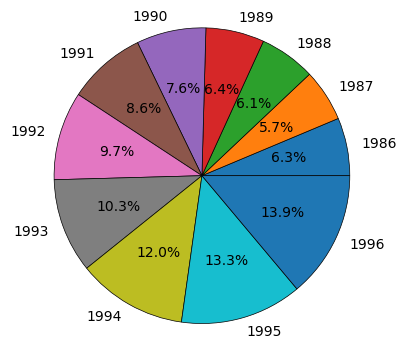

In [15]:
year=df.Year.unique()
value=df.groupby('Year')['Sales'].mean()
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

plt.figure(figsize=(10,4))
plt.pie(value,autopct = lambda pct: func(pct, df['Sales']),labels=year,wedgeprops = wp,radius=1.2);


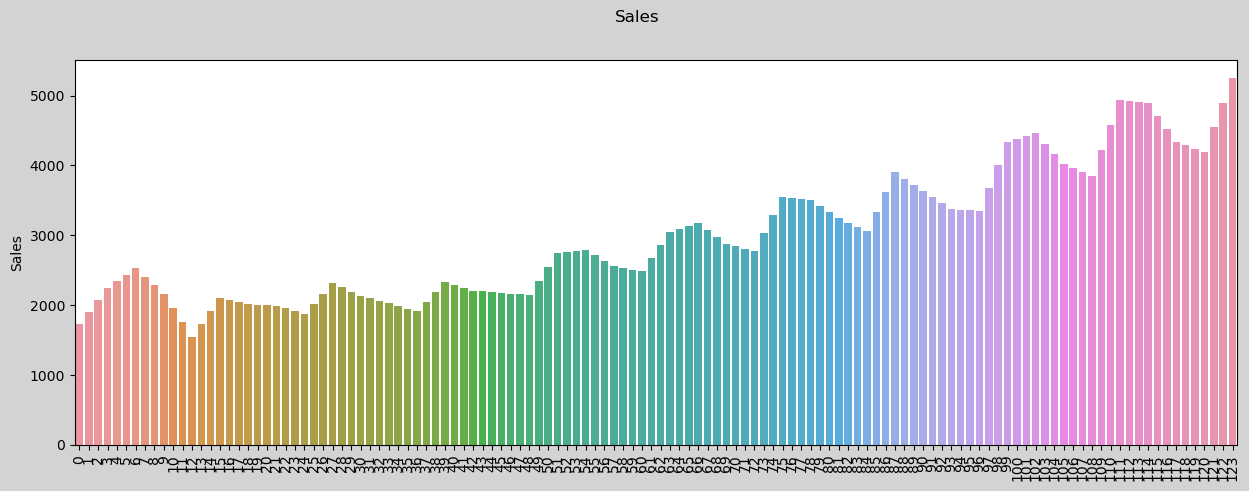

In [17]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
plt.suptitle('Sales')
sns.barplot(x=df.index,y=df.Sales)
plt.xticks(rotation=90);

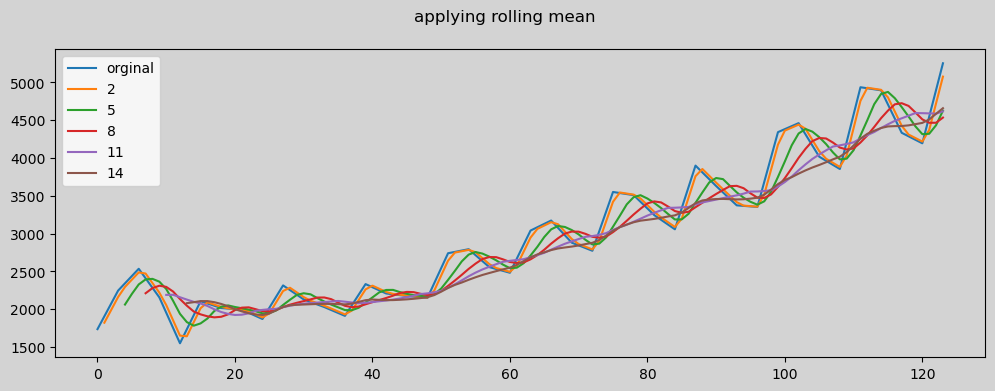

In [19]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df.Sales.plot(label="orginal")
for i in range(2,15,3):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.suptitle('applying rolling mean')
plt.legend(loc='best')

In [228]:
train=df.head(100)#out of 42 datapoints iam training 25dp
test=df.iloc[100:114]#and i am keeping 9points of testing the mean square error

In [229]:
train.head()

,date,Sales,Month,Year,t,log_Sales,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,Jan,1986,1,7.458663,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,Feb,1986,2,7.552170,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,Mar,1986,3,7.637676,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,Apr,1986,4,7.716443,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,May,1986,5,7.758437,25,0,0,0,0,1,0,0,0,0,0,0,0


In [230]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

691.6948067287557

In [231]:
Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


570.4907326866611

In [29]:
#Quadratic 

Quad = smf.ols('Sales~t+tsquare',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","tsquare"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

326.23262394876656

In [30]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1723.1963655498566

In [31]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','tsquare']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

139.55041861562046

In [32]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1789.4374149501846

In [33]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

407.99553089051

In [44]:
df.head()

,date,Sales,Month,Year,t,log_Sales,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,Jan,1986,1,7.458663,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,Feb,1986,2,7.552170,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,Mar,1986,3,7.637676,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,Apr,1986,4,7.716443,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,May,1986,5,7.758437,25,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
new_df=df.copy()
new_df['Day']=new_df['date'].dt.day
new_df['dayofyear']=new_df['date'].dt.dayofyear
new_df['name_of_week']=new_df['date'].dt.week
new_df['season']=new_df['date'].apply(lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2  else 'Spring' if x.month==3 or x.month==4 or x.month==5 else 'Summer' if x.month==6 or x.month==7 or x.month==8 else 'Autumn' if x.month==9 or x.month==10 or x.month==11 else "")
from sklearn.preprocessing import LabelEncoder
new_df['season']=LabelEncoder().fit_transform(new_df['season'])

In [49]:
new_df['Month']=LabelEncoder().fit_transform(new_df['Month'])
new_df.head()

,date,Sales,Month,Year,t,log_Sales,tsquare,Jan,Feb,Mar,...,Jul,Aug,Sep,Oct,Nov,Dec,Day,dayofyear,name_of_week,season
0,1986-01-31,1734.827000,4,1986,1,7.458663,1,1,0,0,...,0,0,0,0,0,0,31,31,5,3
1,1986-02-28,1904.871666,3,1986,2,7.552170,4,0,1,0,...,0,0,0,0,0,0,28,59,9,3
2,1986-03-31,2074.916332,7,1986,3,7.637676,9,0,0,1,...,0,0,0,0,0,0,31,90,14,1
3,1986-04-30,2244.960999,0,1986,4,7.716443,16,0,0,0,...,0,0,0,0,0,0,30,120,18,1
4,1986-05-31,2341.242330,8,1986,5,7.758437,25,0,0,0,...,0,0,0,0,0,0,31,151,22,1


In [56]:
new_df['Year']=pd.to_numeric(new_df['Year'])

In [103]:
new_train = new_df.loc[new_df.index < '01-01-1996']
new_test = new_df.loc[new_df.index >= '01-01-1996']

print(new_train.shape)
print(new_test.shape)

(120, 22)
(4, 22)


In [203]:
import xgboost as xgb
input = new_df[['Day','Year','Month','name_of_week','season','dayofyear']]
output = new_df['Sales']

In [204]:
input.dtypes

Day             int64
Year            int64
Month           int64
name_of_week    int64
season          int32
dayofyear       int64
dtype: object

In [217]:
X_train = input.iloc[:100]
y_train = output.iloc[:100]

X_test = input.iloc[100:]
y_test = output.iloc[100:]

In [218]:
X_train

,Day,Year,Month,name_of_week,season,dayofyear
date,,,,,,
1986-01-31,31,1986,4,5,3,31
1986-02-28,28,1986,3,9,3,59
1986-03-31,31,1986,7,14,1,90
1986-04-30,30,1986,0,18,1,120
1986-05-31,31,1986,8,22,1,151
...,...,...,...,...,...,...
1993-12-31,31,1993,2,52,3,365
1994-01-31,31,1994,4,5,3,31
1994-02-28,28,1994,3,9,3,59


In [219]:
#model building

new_model = xgb.XGBRegressor(base_score=1, booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:squarederror',
                       max_depth=2,learning_rate=0.1,gamma=1)
#predicting the model
new_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2446.70035	validation_1-rmse:4147.98085
[100]	validation_0-rmse:64.66745	validation_1-rmse:621.12207
[200]	validation_0-rmse:51.34852	validation_1-rmse:600.02371
[300]	validation_0-rmse:43.91853	validation_1-rmse:594.41012
[400]	validation_0-rmse:39.79667	validation_1-rmse:592.74979
[500]	validation_0-rmse:35.11319	validation_1-rmse:592.10185
[600]	validation_0-rmse:30.70531	validation_1-rmse:591.89310
[700]	validation_0-rmse:26.87119	validation_1-rmse:593.53482
[800]	validation_0-rmse:24.07805	validation_1-rmse:594.77183
[900]	validation_0-rmse:22.24054	validation_1-rmse:596.15500
[999]	validation_0-rmse:20.86705	validation_1-rmse:598.84072


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [220]:
X_test['Prediction']=new_model.predict(X_test)
X_test

,Day,Year,Month,name_of_week,season,dayofyear,Prediction
date,,,,,,,
1994-05-31 00:00:00,31,1994,8,22,1,151,4154.262695
1994-06-30 00:00:00,30,1994,6,26,2,181,4105.971680
1994-07-31 00:00:00,31,1994,5,30,2,212,4035.816162
1994-08-31 00:00:00,31,1994,1,35,2,243,4015.156982
1994-09-30 00:00:00,30,1994,11,39,0,273,3813.202393
1994-10-31 00:00:00,31,1994,10,44,0,304,3762.479492
1994-11-30 00:00:00,30,1994,9,48,0,334,3737.143799
1994-12-31 00:00:00,31,1994,2,52,3,365,3737.087646
1995-01-31 00:00:00,31,1995,4,5,3,31,3352.543213


<AxesSubplot:xlabel='date'>

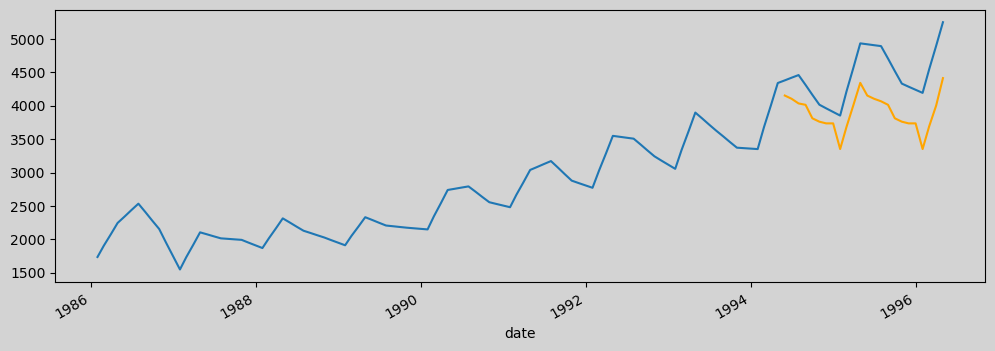

In [221]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
new_df.Sales.plot()
X_test.Prediction.plot(c='orange')

In [148]:
X_test['Prediction']=new_model.predict(X_test)

In [34]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,139.550419
2,rmse_Quad,326.232624
6,rmse_Mult_add_sea,407.995531
1,rmse_Exp,570.490733
0,rmse_linear,691.694807
3,rmse_add_sea,1723.196366
5,rmse_Mult_sea,1789.437415


In [35]:
predict_Data=df.iloc[110:,[0,4,6,7,8,9,10,11,12,13,14,15,16,17,18]]
predict_Data.head()

,date,t,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
110,1995-03-31,111,12321,0,0,1,0,0,0,0,0,0,0,0,0
111,1995-04-30,112,12544,0,0,0,1,0,0,0,0,0,0,0,0
112,1995-05-31,113,12769,0,0,0,0,1,0,0,0,0,0,0,0
113,1995-06-30,114,12996,0,0,0,0,0,1,0,0,0,0,0,0
114,1995-07-31,115,13225,0,0,0,0,0,0,1,0,0,0,0,0


In [222]:
model=smf.ols('Sales~t+tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df.iloc[:110]).fit()

In [223]:
prednew=pd.Series(model.predict(predict_Data))
prednew

110    4518.627496
111    4755.721684
112    4777.610614
113    4799.499543
114    4821.388473
115    4772.483439
116    4723.578405
117    4674.673371
118    4648.134153
119    4621.594935
120    4601.582914
121    4856.286899
122    5105.320300
123    5347.667037
dtype: float64

In [224]:
predict_Data["forecasted_Sales"] = pd.Series(prednew)

In [225]:
new_var = pd.concat([df.iloc[:110],predict_Data])
new_var=new_var.set_index('date')

<AxesSubplot:xlabel='date'>

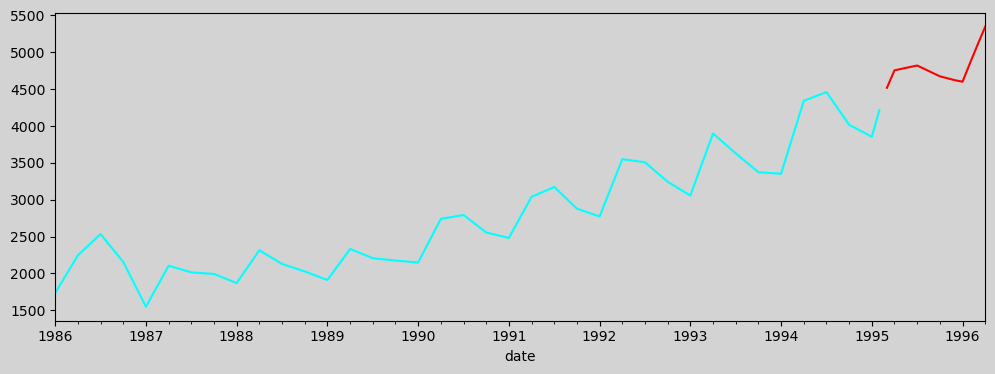

In [226]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
new_var.Sales.plot(c='cyan')
new_var.forecasted_Sales.plot(c='red')